<center><h1>➕➖✖️➗ Multiple Handwritten Digit Recognition.➕➖✖️➗</h1></center>

# 🧮Overview

The application will use a deep learning algorithm trained on a large dataset of handwritten digits to accurately recognize and differentiate between multiple digits. This project aims to provide a convenient and accurate solution for mathematical calculations using handwritten digits, which can be useful in a variety of settings, such as banking, education, and finance.

# 🔬Import Necessary Libraries
CNN (Convolutional Neural Network) It is a deep learning neural network commonly used in image recognition and classification tasks. It is designed to automatically and adaptively learn spatial hierarchies of features from input data. The library implements various layers such as convolutional layers, pooling layers, and fully connected layers to build a neural network model. The library can also be used for tasks such as object detection, segmentation, and localization.

In [ ]:
# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import os
from os import listdir
from os.path import isfile, join
from zipfile import ZipFile

# CV and Image
import cv2
from PIL import Image

# pickle
import pickle

# keras
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils.contours import sort_contours

#Model
from sklearn.model_selection import train_test_split

# plotly
import plotly.graph_objs as go
from plotly import subplots
import plotly

#confusion_matrix-->Loss and Accuracy Plot
from sklearn.metrics import classification_report, confusion_matrix

print("Done")

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# with ZipFile('/content/dataset_2.2.zip', 'r') as zipObj:
#   zipObj.extractall('/content/')

In [ ]:
with ZipFile('/content/drive/MyDrive/IS Report/02/dataset_2.2.zip', 'r') as zipObj:
  zipObj.extractall('/content/')

# 💾 Data Collection

To train a CNN model for Multiple Handwritten Digit Recognition, a large dataset of handwritten digits is required. For this task, we have gathered data from two sources - kaggle.com and our own prepared dataset, which consists of 12,000 training images. Overall, the quality and quantity of the data collected are critical factors in the success of the Multiple Handwritten Digit Recognition application.

The collected data needs to be preprocessed to make sure it is in a suitable format for training the machine learning model. This may involve resizing, normalization, and conversion to grayscale or binary format. The preprocessed data should also be split into training, validation, and testing sets to evaluate the model's performance.




In [ ]:
p = "/content/dataset_2.2/"

print("These are the folders we'll be working with :")

for f in os.listdir(p):
    print(f)

These are the folders we'll be working with :
dec
9
sub
0
div_1
1
2
add
6
5
div_2
3
7
mul_1
8
mul_2
4


In [ ]:
def load_images(folder):

    train_data=[]

    for filename in os.listdir(folder):

        if filename != ".directory" :

            image = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            image = ~image

            if image is not None:

                ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
                contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
                contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

                a = int(28)
                b = int(28)
                maxi = 0

                for c in contour:

                    x,y,a,b=cv2.boundingRect(c)
                    maxi=max(a*b,maxi)

                    if maxi==a*b:

                        x_max=x
                        y_max=y
                        w_max=a
                        h_max=b

                im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
                im_resize = cv2.resize(im_crop,(28,28))
                im_resize = np.reshape(im_resize,(784,1))
                train_data.append(im_resize)

    return train_data

## Concatenating Data of All Characters

In [ ]:
data = []

data = load_images(p+"0")
for i in range(0, len(data)):
    data[i] = np.append(data[i], ['0'])
print(len(data))

595


In [ ]:
iter = 0

for i in list(os.listdir(p)) :

    if i not in ["0", ".directory"] :

        print("Iter :", iter)
        print("Working with the", i, "folder")

        data_i = load_images(p+i)

        if i in [str(k) for k in range(1, 10)] :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])

        if i == "add" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])

        if i == "sub" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])


        if i == "mul_1" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])

        if i == "mul_2" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])

        if i == "div_1" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])
        if i == "div_2" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["15"])

        if i == "dec" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["16"])


        data = np.concatenate((data, data_i))
        print(len(data))

        print()

        iter += 1

Iter : 0
Working with the dec folder
1219

Iter : 1
Working with the 9 folder
1765

Iter : 2
Working with the sub folder
2420

Iter : 3
Working with the div_1 folder
3038

Iter : 4
Working with the 1 folder
3600

Iter : 5
Working with the 2 folder
4033

Iter : 6
Working with the add folder
4629

Iter : 7
Working with the 6 folder
5210

Iter : 8
Working with the 5 folder
5643

Iter : 9
Working with the div_2 folder
7407

Iter : 10
Working with the 3 folder
7948

Iter : 11
Working with the 7 folder
8481

Iter : 12
Working with the mul_1 folder
9058

Iter : 13
Working with the 8 folder
12679

Iter : 14
Working with the mul_2 folder
14136

Iter : 15
Working with the 4 folder
14662



## Creating Train and Test set

In [ ]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

data = pd.read_csv('/content/train_handwritten.csv',index_col=False)
labels = data[['784']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,226,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,48,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,149,232,237,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,51,159,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.random.seed(1212)
labels=np.array(labels)
cat=to_categorical(labels,num_classes=17)
cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(14662, 28, 28, 1)

In [ ]:
l=[]
for i in range(X_train.shape[0]):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

np.random.seed(7)

**Split Train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, cat, test_size = 0.2, random_state = 101)

# 💡Building a Convolutional Neural Network (CNN) model

## Baseline Model
This code is for building a Convolutional Neural Network (CNN) model for handwritten digit recognition. The model is implemented using the Keras API from Tensorflow.

The model consists of 4 sets of layers: two sets of Convolutional layers followed by a Max Pooling layer, and two more sets of Convolutional layers followed by another Max Pooling layer. These layers help the model to learn and identify features in the input image.

After the final Max Pooling layer, the output is flattened and fed to a fully connected layer, which consists of 256 neurons. The activation function used in this layer is ReLU.

Finally, the output layer consists of 16 neurons with a softmax activation function, which provides probabilities for each of the 16 classes (digits 0 to 9, plus 6 additional symbols). The model will be trained to minimize the categorical cross-entropy loss between the predicted probabilities and the true labels.

Overall, this model architecture is designed to learn and identify features in the input image that are useful for correctly classifying the digit or symbol represented in the image.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11729, 28, 28, 1)
(2933, 28, 28, 1)
(11729, 17)
(2933, 17)


In [ ]:
# 1 Set the random seed
tf.random.set_seed(42)

In [ ]:
# 2 Set the random seed
tf.random.set_seed(2023)

In [ ]:
# 3 Set the random seed
tf.random.set_seed(698)

In [ ]:
# 4 Set the random seed
tf.random.set_seed(719)

In [ ]:
# 5 Set the random seed
tf.random.set_seed(2566)

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(17, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                      

In [ ]:
epochs = 200
batch_size = 70

In [ ]:
history = model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_test,y_test))

Epoch 1/200
168/168 [==============================] - 5s 13ms/step - loss: 1.0712 - accuracy: 0.8415 - val_loss: 0.1384 - val_accuracy: 0.9574
Epoch 2/200
168/168 [==============================] - 1s 9ms/step - loss: 0.0859 - accuracy: 0.9745 - val_loss: 0.0992 - val_accuracy: 0.9720
Epoch 3/200
168/168 [==============================] - 1s 8ms/step - loss: 0.0457 - accuracy: 0.9849 - val_loss: 0.0985 - val_accuracy: 0.9690
Epoch 4/200
168/168 [==============================] - 1s 7ms/step - loss: 0.0375 - accuracy: 0.9859 - val_loss: 0.0825 - val_accuracy: 0.9755
Epoch 5/200
168/168 [==============================] - 1s 9ms/step - loss: 0.0323 - accuracy: 0.9877 - val_loss: 0.0683 - val_accuracy: 0.9799
Epoch 6/200
168/168 [==============================] - 1s 8ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0655 - val_accuracy: 0.9847
Epoch 7/200
168/168 [==============================] - 1s 8ms/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.1128 - val_accuracy: 0.966

### Loss and Accuracy Baseline

To evaluate if the model is overfitting, the model's loss and accuracy on both the training and validation sets need to be compared. Overfitting occurs when the model learns the training data too well and does not generalize well to new, unseen data, resulting in a high training accuracy but a low validation accuracy.

One common way to address overfitting is to include regularization techniques in the model, such as data augmentation. This involves increasing the size of the training dataset by artificially creating new examples from the original data, which can help the model generalize better to unseen data. Other regularization techniques such as dropout layers can also be used to prevent overfitting. Another approach is to use early stopping during the training process to prevent the model from overfitting to the training data.

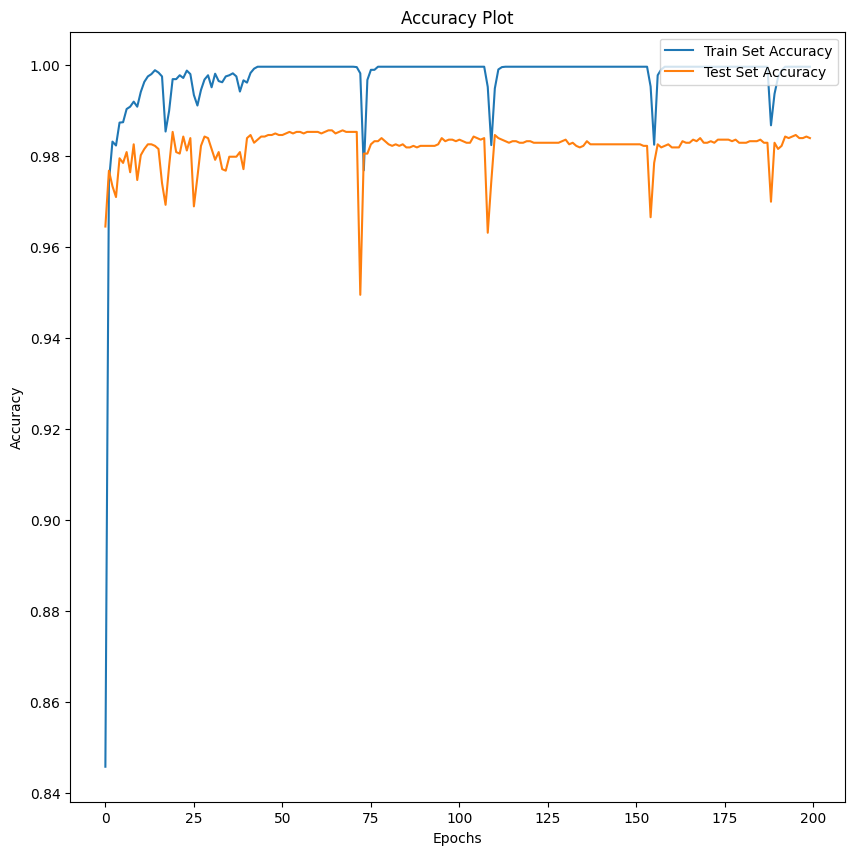

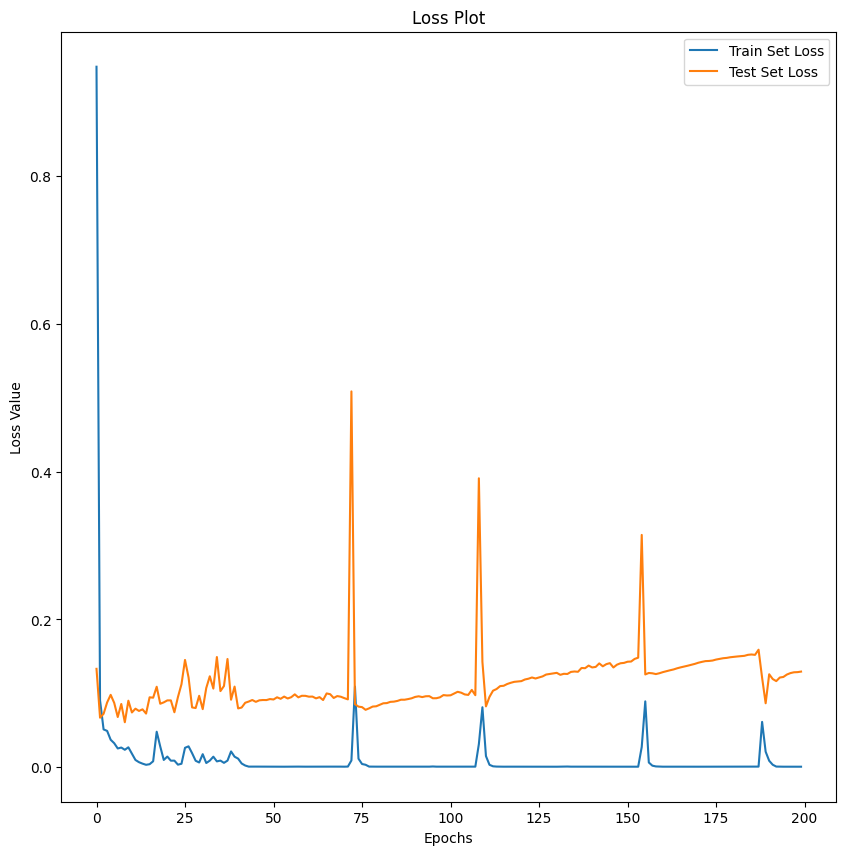

In [ ]:
# 1
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

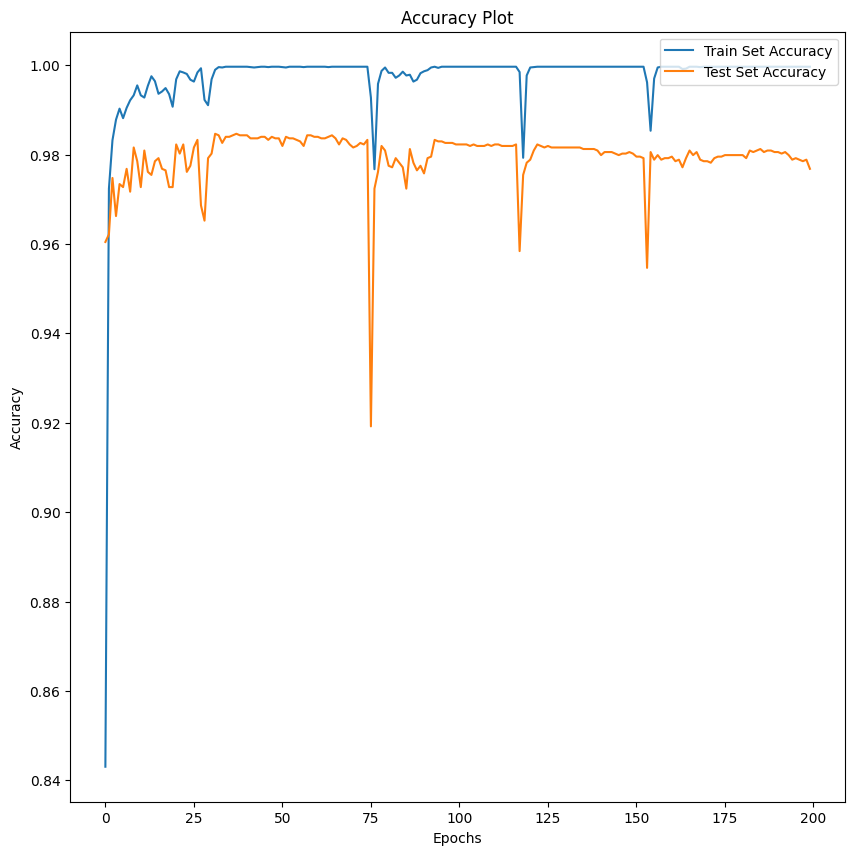

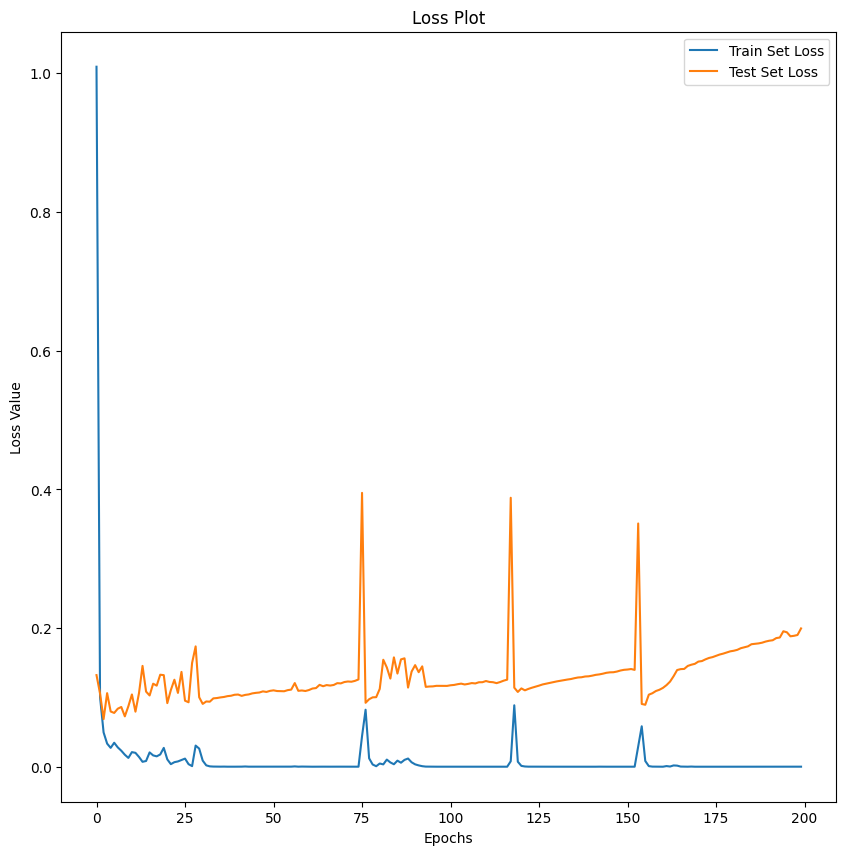

In [ ]:
#2
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

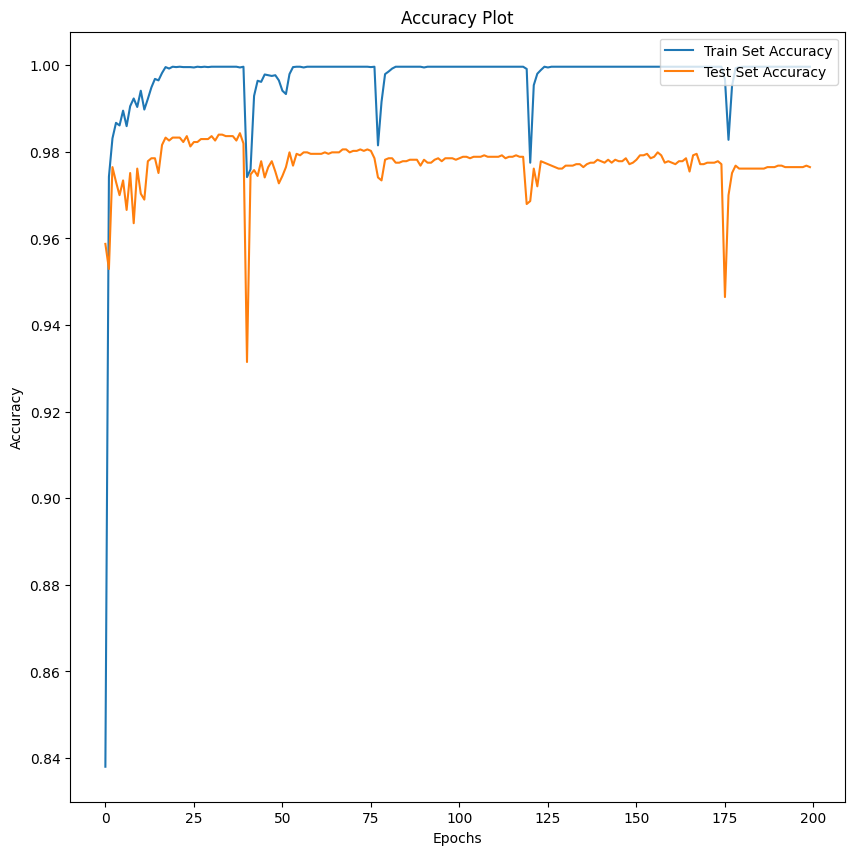

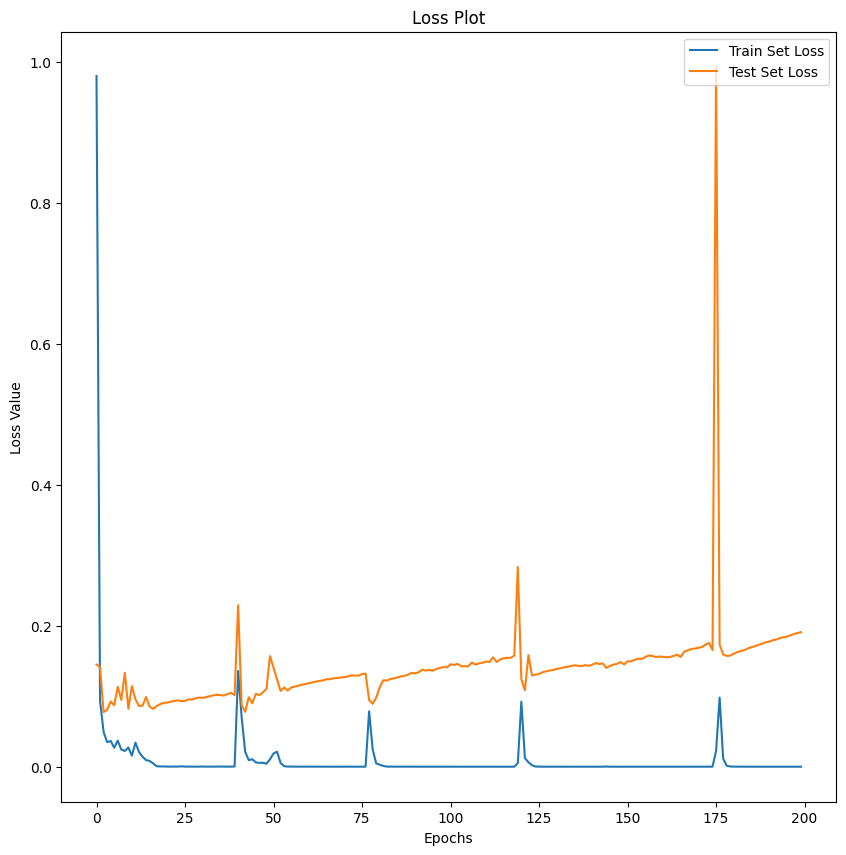

In [ ]:
#3
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

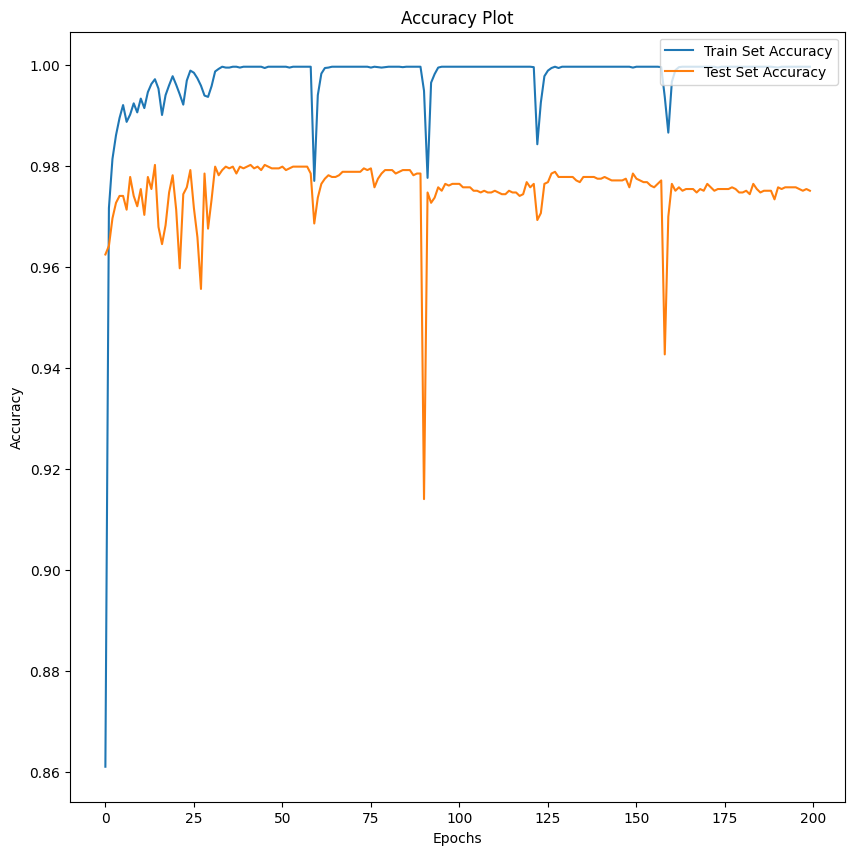

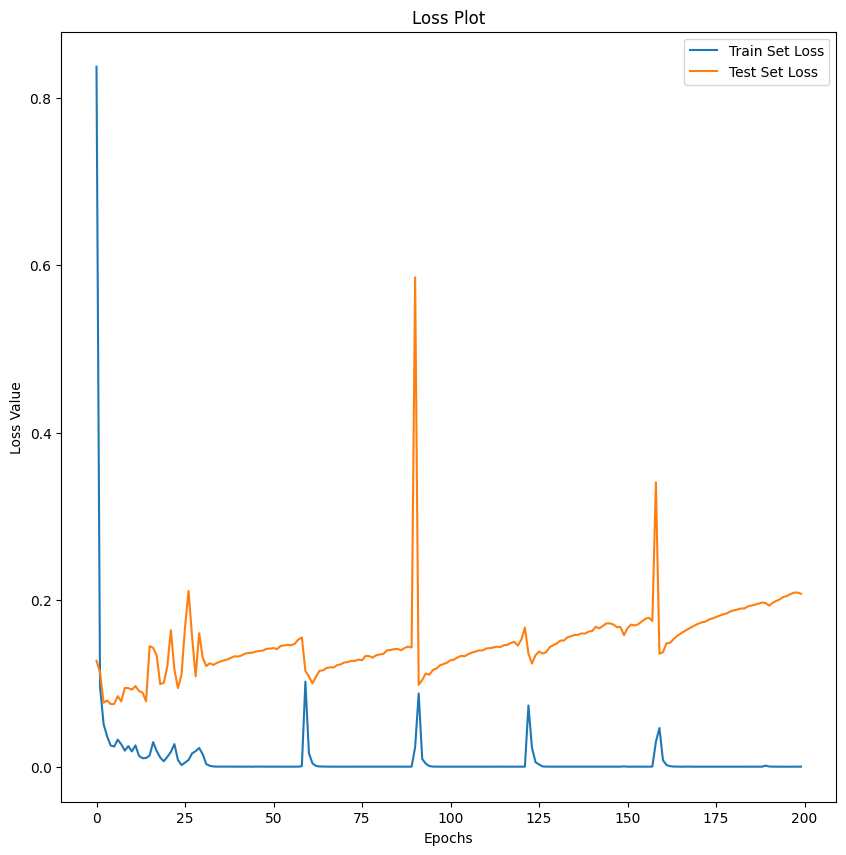

In [ ]:
# 4
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

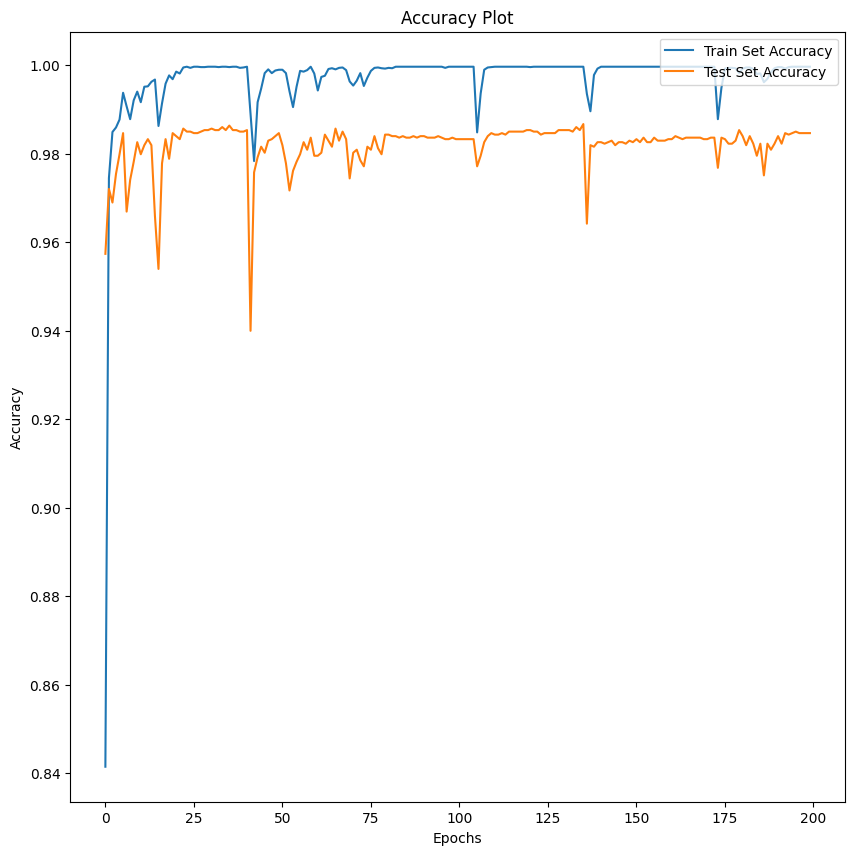

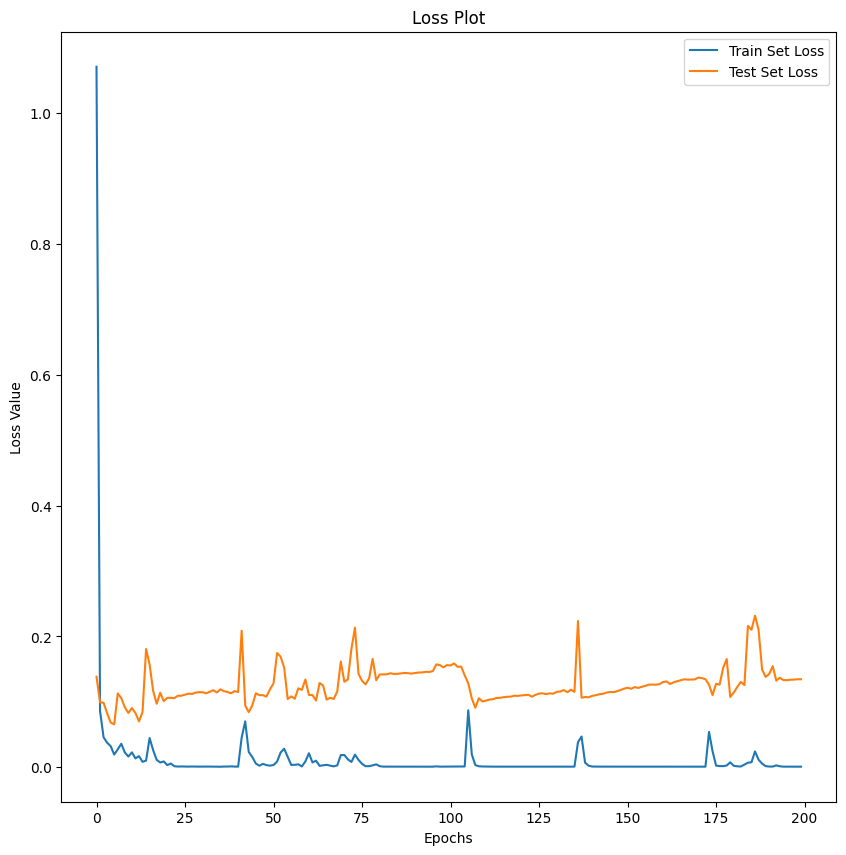

In [ ]:
# 5
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))

    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")

    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

In [ ]:
plot_accuracy_and_loss(history)

### Classification Report

In [ ]:
#1
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       1.00      0.98      0.99       109
           2       0.99      1.00      1.00       105
           3       0.98      0.96      0.97       119
           4       1.00      0.98      0.99        97
           5       0.97      0.96      0.97        78
           6       0.98      0.99      0.99       112
           7       0.99      1.00      1.00       105
           8       0.99      1.00      1.00       713
           9       1.00      0.99      1.00       103
          10       0.98      0.99      0.98       120
          11       0.90      0.90      0.90       115
          12       1.00      0.98      0.99       109
          13       1.00      1.00      1.00       294
          14       0.89      0.89      0.89       123
          15       1.00      1.00      1.00       374
          16       0.98     

In [ ]:
#2
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       126
           1       0.97      0.96      0.97       112
           2       0.98      0.96      0.97        82
           3       0.99      0.97      0.98       117
           4       0.97      0.96      0.96        97
           5       0.96      0.99      0.98        80
           6       0.98      0.98      0.98       124
           7       0.94      0.99      0.97       101
           8       0.99      0.99      0.99       713
           9       0.98      0.94      0.96       103
          10       0.99      1.00      1.00       135
          11       0.86      0.91      0.89       129
          12       0.98      0.99      0.99       107
          13       1.00      1.00      1.00       269
          14       0.91      0.85      0.88       145
          15       1.00      1.00      1.00       366
          16       0.98     

In [ ]:
#3
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       1.00      1.00      1.00       112
           2       0.99      0.98      0.98        82
           3       0.99      0.99      0.99       117
           4       0.96      0.95      0.95        97
           5       0.99      0.99      0.99        80
           6       0.98      0.98      0.98       124
           7       1.00      0.97      0.98       101
           8       0.99      1.00      0.99       713
           9       0.96      0.99      0.98       103
          10       0.99      0.99      0.99       135
          11       0.84      0.89      0.86       129
          12       0.97      0.96      0.97       107
          13       1.00      1.00      1.00       269
          14       0.87      0.81      0.84       145
          15       1.00      1.00      1.00       366
          16       0.99     

In [ ]:
#4
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       0.96      0.96      0.96       112
           2       0.97      0.95      0.96        82
           3       0.98      0.97      0.98       117
           4       0.95      0.98      0.96        97
           5       0.98      1.00      0.99        80
           6       0.99      0.98      0.99       124
           7       0.97      0.99      0.98       101
           8       0.99      1.00      0.99       713
           9       0.97      0.95      0.96       103
          10       0.99      1.00      1.00       135
          11       0.83      0.90      0.86       129
          12       0.99      0.99      0.99       107
          13       1.00      1.00      1.00       269
          14       0.90      0.80      0.85       145
          15       1.00      1.00      1.00       366
          16       0.97     

In [ ]:
#5
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       126
           1       0.97      0.99      0.98       109
           2       0.96      1.00      0.98       105
           3       0.98      0.96      0.97       119
           4       0.99      0.96      0.97        97
           5       0.97      0.96      0.97        78
           6       0.96      1.00      0.98       112
           7       1.00      0.96      0.98       105
           8       1.00      1.00      1.00       713
           9       1.00      0.99      1.00       103
          10       0.98      1.00      0.99       120
          11       0.89      0.94      0.92       115
          12       1.00      1.00      1.00       109
          13       1.00      1.00      1.00       294
          14       0.94      0.90      0.92       123
          15       1.00      1.00      1.00       374
          16       0.98     

In [ ]:
#1
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 5ms/step - loss: 0.1295 - accuracy: 0.9840


[0.12947510182857513, 0.9839754700660706]

In [ ]:
#2
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 5ms/step - loss: 0.1999 - accuracy: 0.9768


[0.19989065825939178, 0.9768155217170715]

In [ ]:
#3
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9765


[0.19152890145778656, 0.9764745831489563]

In [ ]:
#4
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9751


[0.20741058886051178, 0.9751108288764954]

In [ ]:
#5
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9847


[0.1344841569662094, 0.984657347202301]

<Axes: >

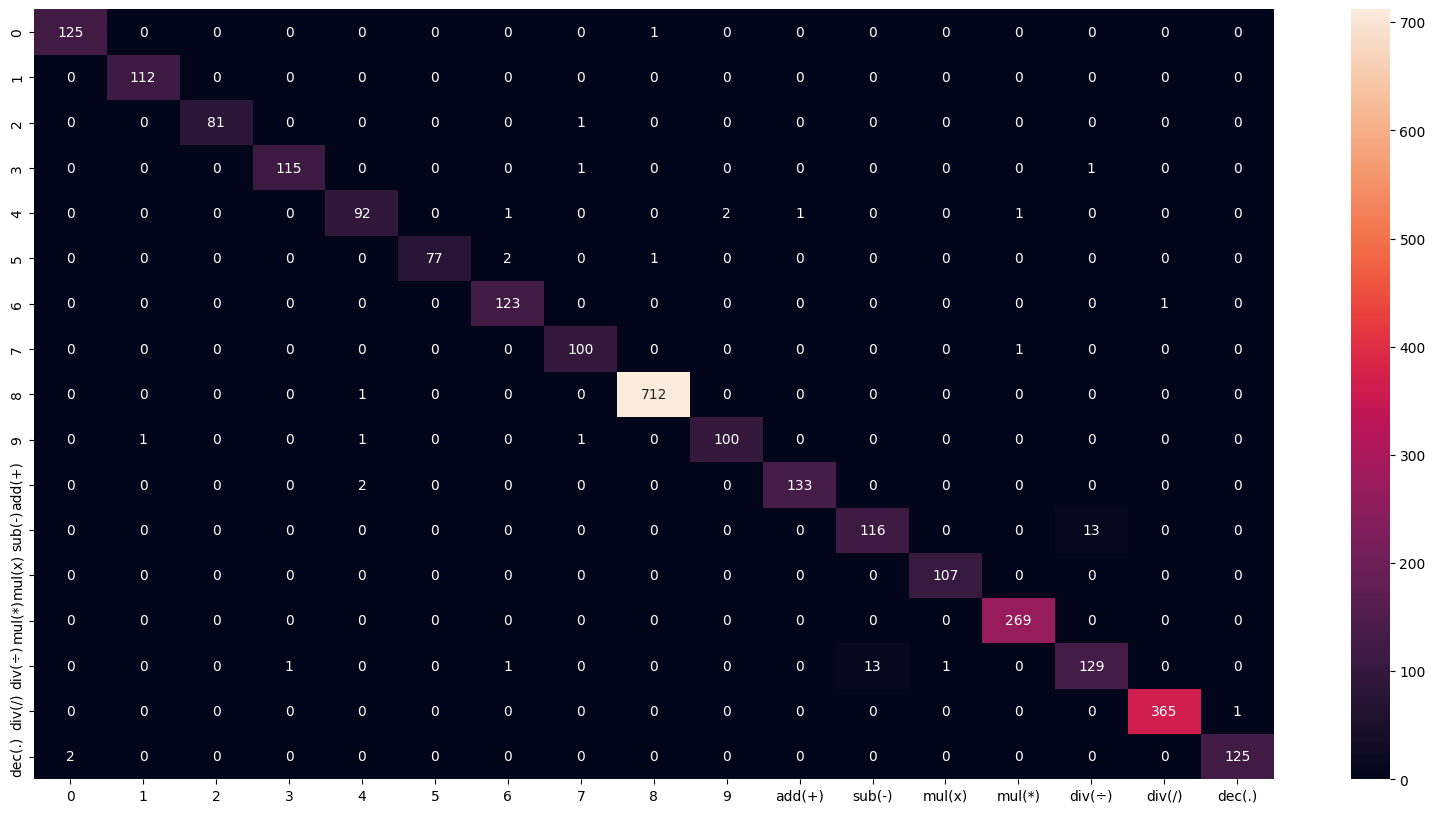

In [ ]:
matrix = confusion_matrix(Y_test_hat, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'add(+)', 'sub(-)', 'mul(x)', 'mul(*)', 'div(÷)', 'div(/)','dec(.)'],
                     columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'add(+)', 'sub(-)', 'mul(x)', 'mul(*)', 'div(÷)', 'div(/)','dec(.)'])
figure = plt.figure(figsize=(20, 10))
sns.heatmap(df_cm, annot=True, fmt='d')

# Building CNN to solve the overfitting model
As the model is facing overfitting issues, I used **regularization techniques**. Regularization is a technique in machine learning used to prevent overfitting, which happens when a model performs well on the training data but poorly on the test data. Regularization helps to enhance the generalization of the model by adding extra constraints on the weights or parameters of the model.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11729, 28, 28, 1)
(2933, 28, 28, 1)
(11729, 17)
(2933, 17)


**Fill Mode**

**Batch normalization** is another regularization technique that helps to reduce overfitting by normalizing the inputs of the neural network at each layer. This technique helps to improve the stability of the training process by reducing the internal covariate shift, which occurs when the distribution of the inputs to a layer changes during training.

**Dropout** is a regularization technique that randomly drops out some of the neurons in the neural network during training. This technique helps to prevent overfitting by reducing the complex co-adaptations between neurons, which can lead to overfitting. Dropout forces the remaining neurons to learn more useful features and helps to improve the generalization of the model.

In [ ]:
# 1 Set the random seed
tf.random.set_seed(42)

In [ ]:
# 2 Set the random seed
tf.random.set_seed(2023)

In [ ]:
# 3 Set the random seed
tf.random.set_seed(698)

In [ ]:
# 4 Set the random seed
tf.random.set_seed(719)

In [ ]:
# 5 Set the random seed
tf.random.set_seed(2566)

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(tf.keras.layers.Dropout(0.3))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(tf.keras.layers.Dropout(0.3))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.30))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(17, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 activation_25 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 dropout_15 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                     

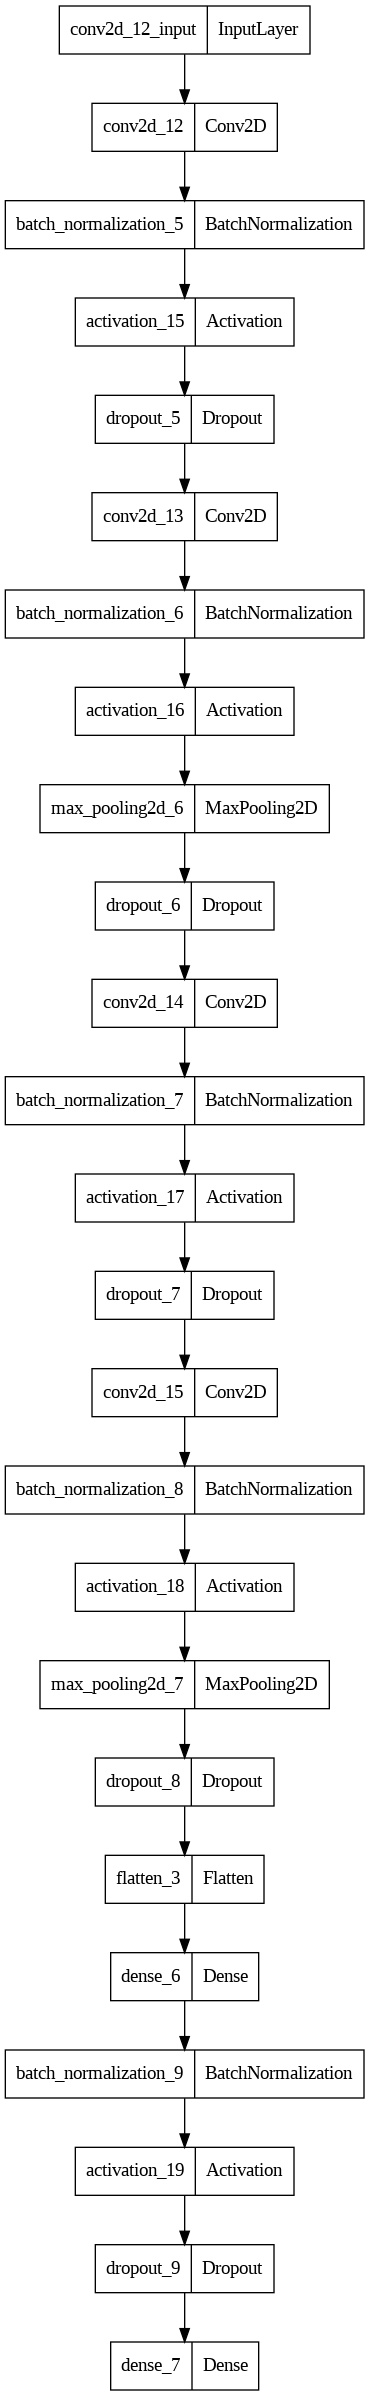

In [ ]:
plot_model(model, show_layer_names=True)

**Data augmentation** is one of the regularization techniques that involves creating additional training data by applying transformations such as rotations, translations, zooms, and flips to the existing data. This technique helps to prevent overfitting by increasing the size and diversity of the training dataset, which can improve the performance of the model on the test data.

In [ ]:
'data augmentation'
datagen = ImageDataGenerator(
        featurewise_center=False,  # กำหนดให้ค่า mean ของภาพอยู่ที่ 0 ในชุดข้อมูล
        samplewise_center=False,  # กำหนดให้ค่า mean ของแต่ละภาพอยู่ที่ 0
        featurewise_std_normalization=False,  # กำหนดให้แบ่งข้อมูลในชุดด้วยค่า Standard Deviation
        samplewise_std_normalization=False,  # กำหนดให้แบ่งข้อมูลในแต่ละภาพด้วยค่า Standard Deviation
        zca_whitening=False,  # กำหนดให้ปรับค่าแต่ละภาพด้วยการใช้ ZCA Whitening (การทำ PCA (Principal Component Analysis) กับข้อมูล แล้วสร้าง matrix ที่แปลงข้อมูลให้มี correlation ซึ่งกันและกัน)
        rotation_range=10,  # กำหนดการเพิ่มการหมุนภาพในช่วงระดับองศาตั้งแต่ 0-10 องศา
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # กำหนดการเพิ่มการซูมภาพแบบสุ่มด้วยค่าตั้งแต่ 0-0.1
        height_shift_range=0.1,  # กำหนดการเพิ่มการเลื่อนภาพแนวนอนแบบสุ่มด้วยค่าตั้งแต่ 0-0.1
        horizontal_flip=False,  # กำหนดการสลับภาพแบบสุ่มในแนวนอน
        vertical_flip=False)  # กำหนดการสลับภาพแบบสุ่มในแนวตั้ง

In [ ]:
datagen.fit(X_train)
'fitting the model'
epochs = 200
batch_size = 70

In [ ]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5',
                             monitor='val_loss', save_best_only=True,
                             verbose=1, mode='min')

callbacks = [checkpoint]

In [ ]:
history = model.fit_generator(
                                datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs, #An epoch is an iteration over the entire x and y data provided
                                validation_data = (X_test,y_test), #Data on which to evaluate the loss and any model metrics at the end of each epoch.
                                verbose = 1, #output
                                steps_per_epoch=X_train.shape[0] // batch_size,  # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
                                callbacks=callbacks
                              )


'saving the model HDF5 binary data format'
model.save("/content/maths_symbol_and_digits_recognition.h5")

Epoch 1/200


<ipython-input-67-e6813fe17538>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


167/167 [==============================] - ETA: 0s - loss: 0.7995 - accuracy: 0.7544
Epoch 1: val_loss improved from inf to 0.42784, saving model to maths_symbol_and_digits_recognition.h5
167/167 [==============================] - 16s 67ms/step - loss: 0.7995 - accuracy: 0.7544 - val_loss: 0.4278 - val_accuracy: 0.8602
Epoch 2/200
167/167 [==============================] - ETA: 0s - loss: 0.3380 - accuracy: 0.8911
Epoch 2: val_loss improved from 0.42784 to 0.36276, saving model to maths_symbol_and_digits_recognition.h5
167/167 [==============================] - 10s 58ms/step - loss: 0.3380 - accuracy: 0.8911 - val_loss: 0.3628 - val_accuracy: 0.8871
Epoch 3/200
167/167 [==============================] - ETA: 0s - loss: 0.2427 - accuracy: 0.9201
Epoch 3: val_loss improved from 0.36276 to 0.10266, saving model to maths_symbol_and_digits_recognition.h5
167/167 [==============================] - 8s 46ms/step - loss: 0.2427 - accuracy: 0.9201 - val_loss: 0.1027 - val_accuracy: 0.9635
Epoch 

## Loss and Accuracy

When overfitting is resolved, the loss and accuracy graphs show that the model is performing well on both the training and validation sets. The loss on the training set decreases with each epoch while the loss on the validation set also decreases but at a slower rate. The accuracy on the training set increases with each epoch, and the accuracy on the validation set also increases, but at a slower rate than the training set.

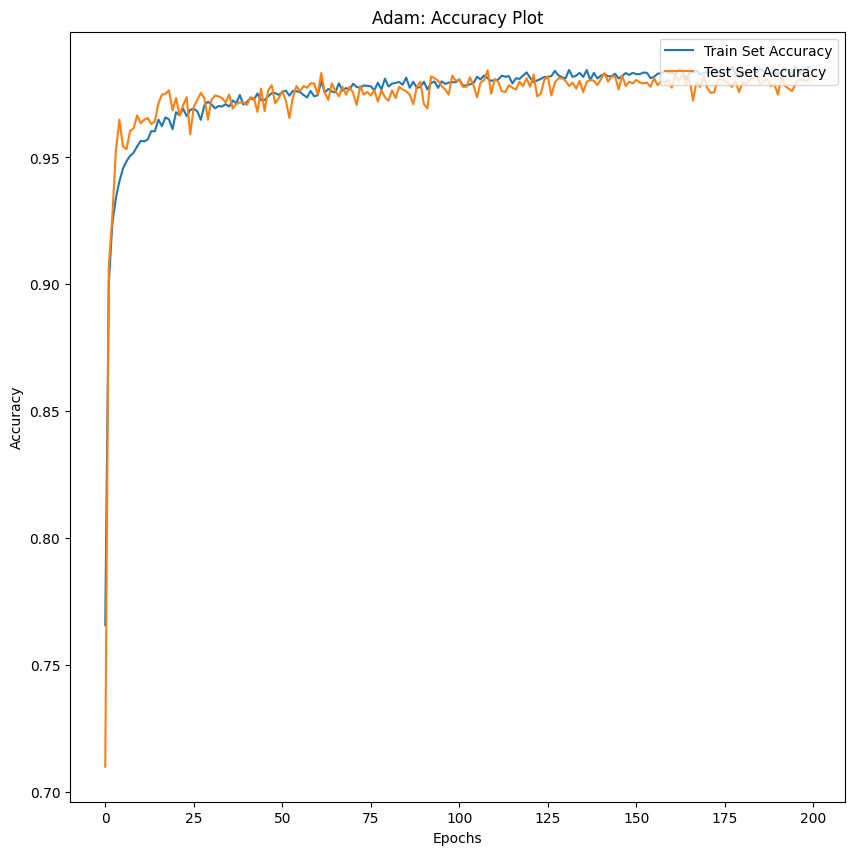

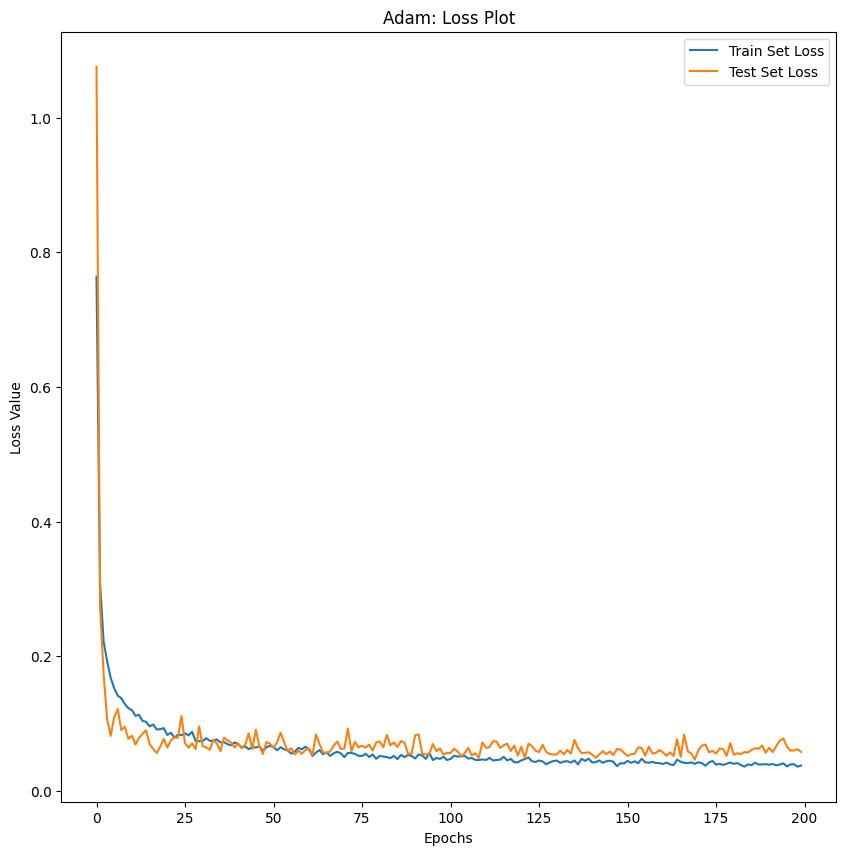

In [ ]:
# 1
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Adam: Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Adam: Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

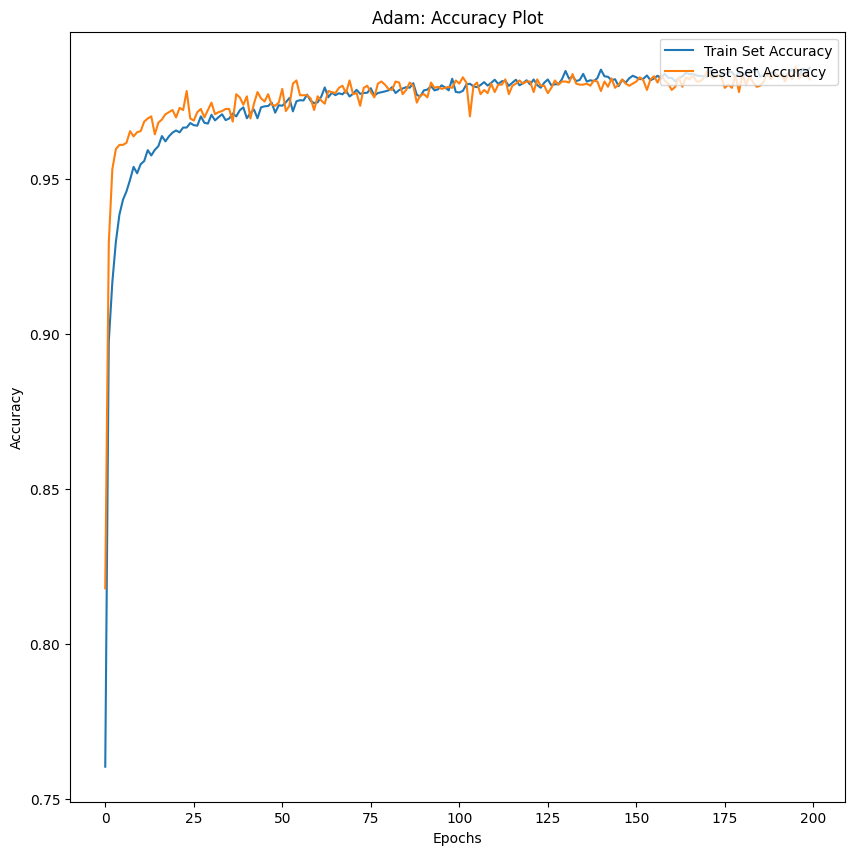

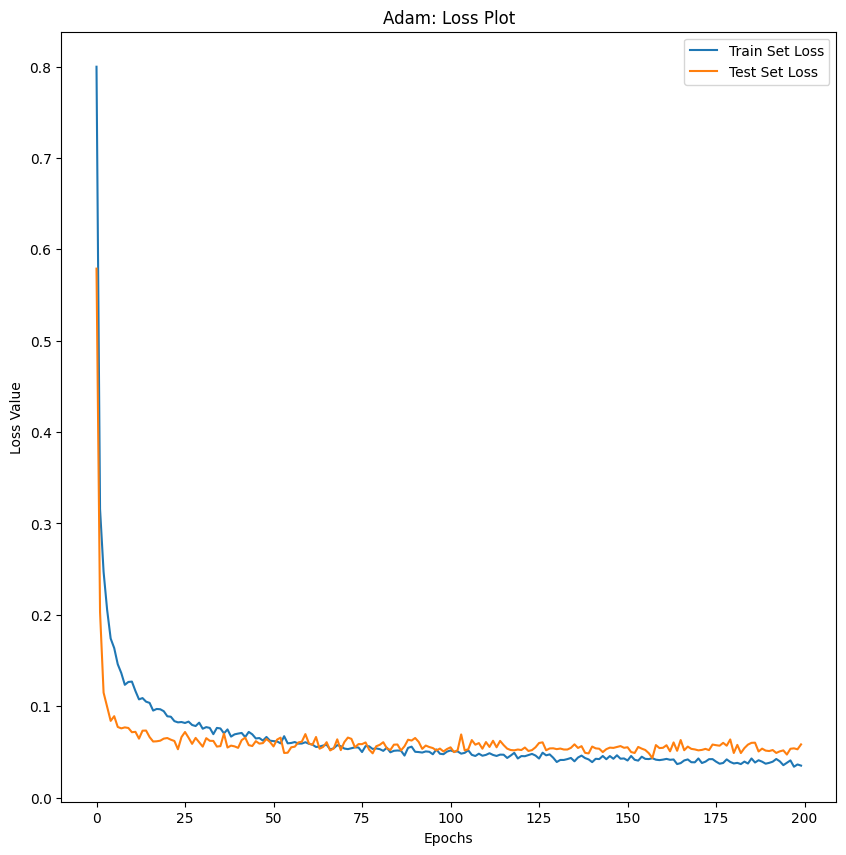

In [ ]:
# 2
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Adam: Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Adam: Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

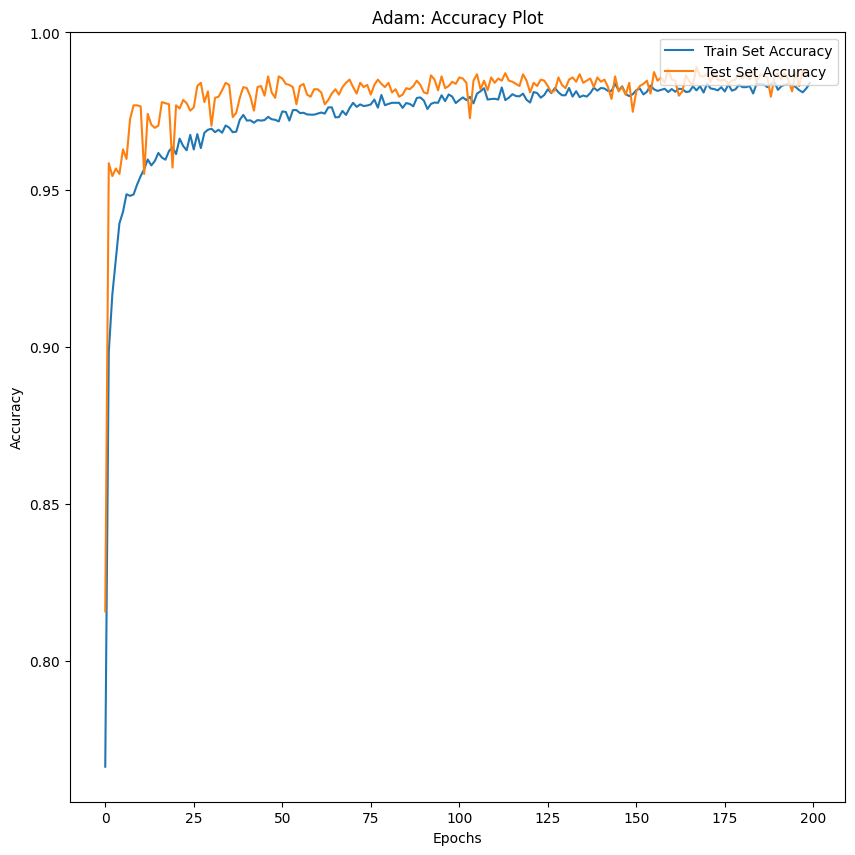

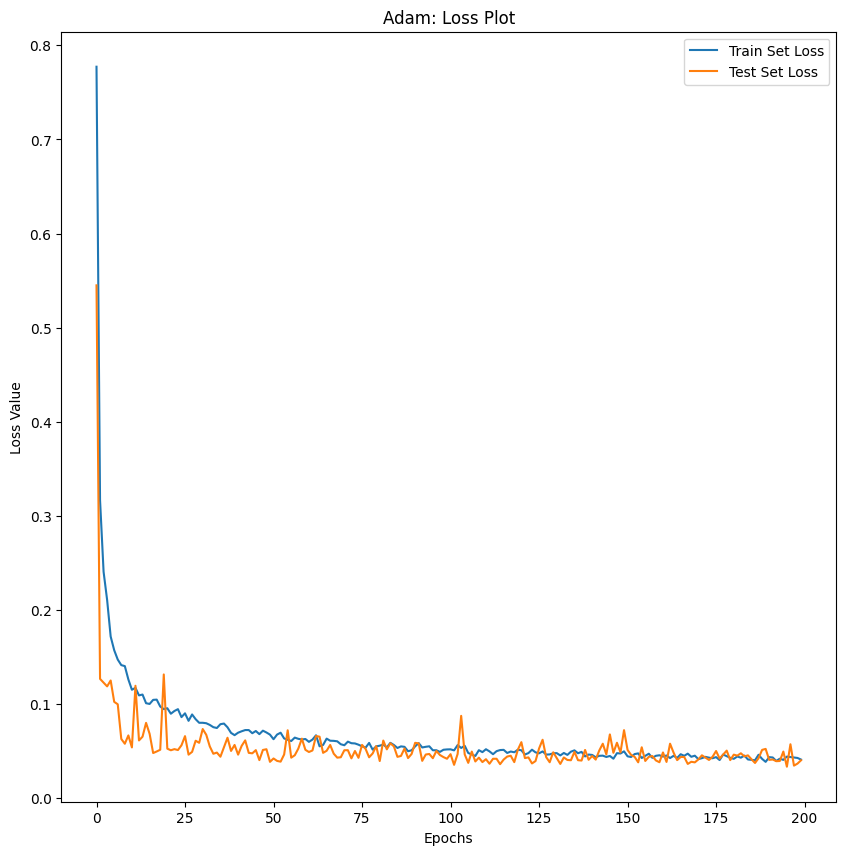

In [ ]:
# 3
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Adam: Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Adam: Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

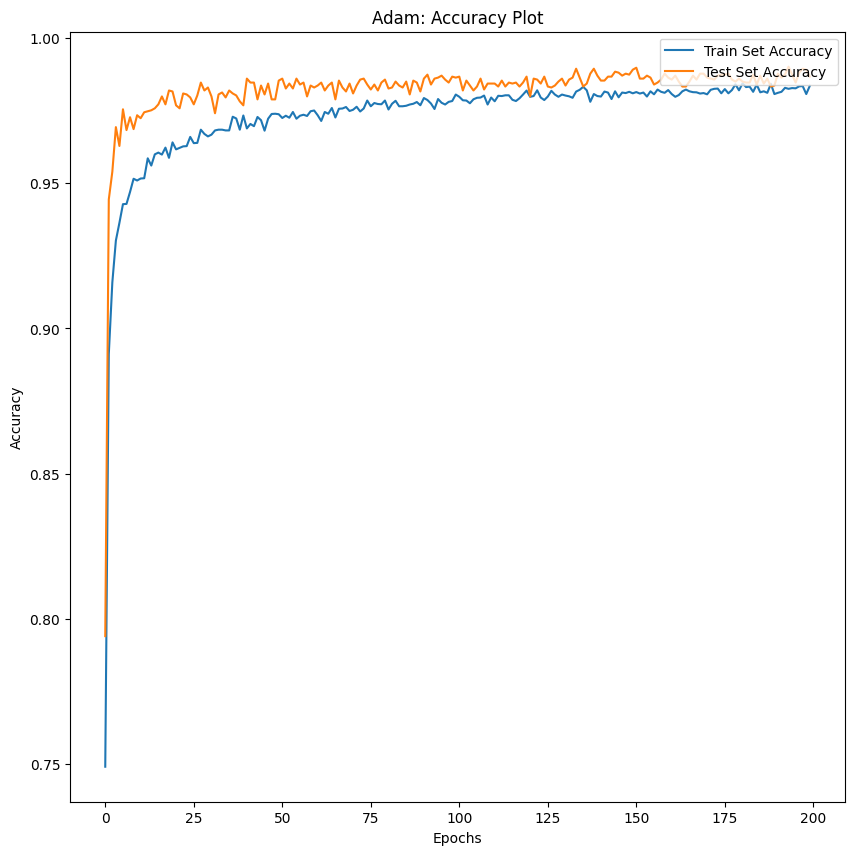

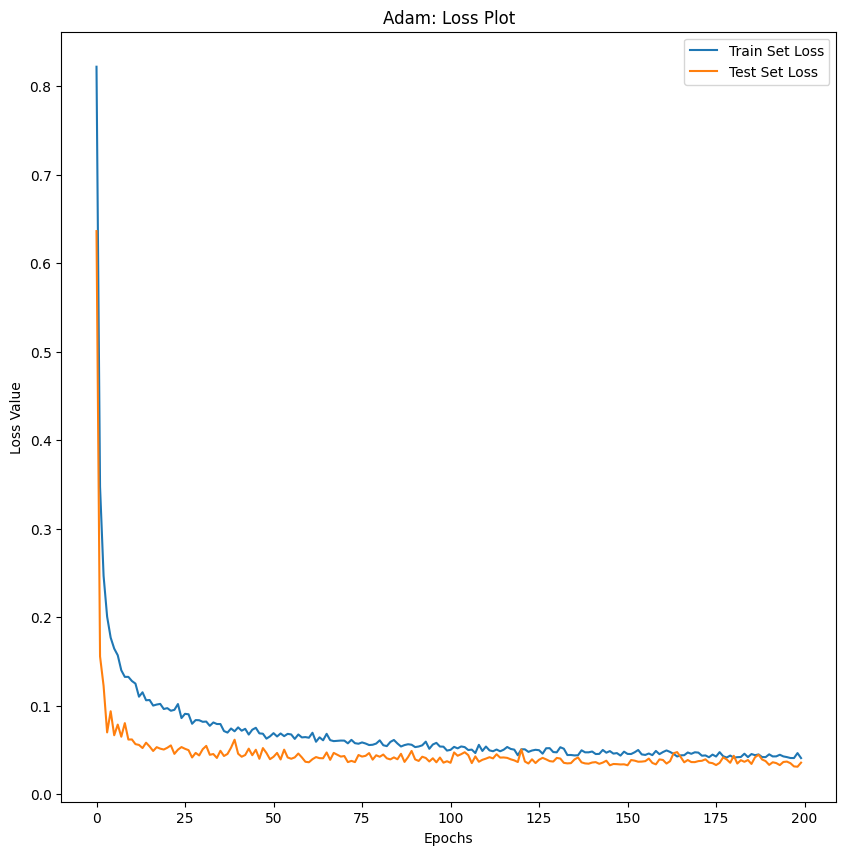

In [ ]:
# 4
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Adam: Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Adam: Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

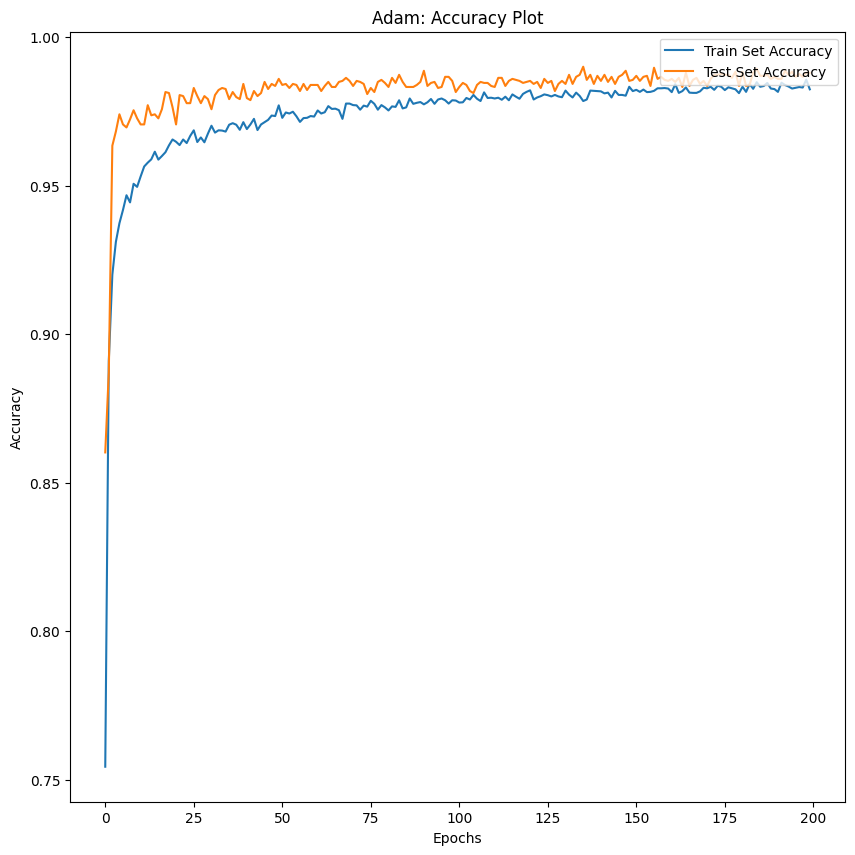

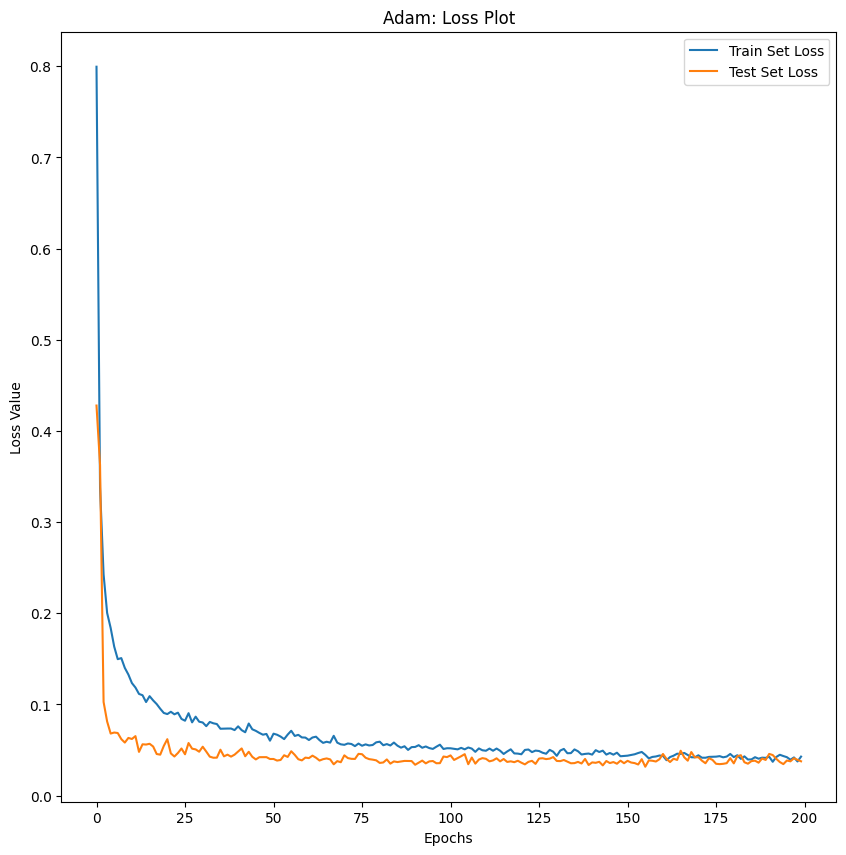

In [ ]:
# 5
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Set Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Adam: Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Set Loss')
plt.plot(history.history['val_loss'], label='Test Set Loss')
plt.title('Adam: Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))

    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")

    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

In [ ]:
plot_accuracy_and_loss(history)

## Classification Report

In [ ]:
# 1
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       126
           1       0.99      0.97      0.98       112
           2       0.99      1.00      0.99        82
           3       1.00      0.99      1.00       117
           4       0.99      1.00      0.99        97
           5       0.99      1.00      0.99        80
           6       1.00      0.99      1.00       124
           7       0.98      1.00      0.99       101
           8       1.00      0.99      1.00       713
           9       1.00      1.00      1.00       103
          10       1.00      1.00      1.00       135
          11       0.82      0.88      0.85       129
          12       1.00      1.00      1.00       107
          13       1.00      1.00      1.00       269
          14       0.88      0.82      0.85       145
          15       1.00      1.00      1.00       366
          16       0.99     

In [ ]:
# 2
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       126
           1       0.99      0.98      0.99       112
           2       1.00      1.00      1.00        82
           3       0.99      0.99      0.99       117
           4       0.99      0.99      0.99        97
           5       1.00      1.00      1.00        80
           6       1.00      0.99      1.00       124
           7       0.99      1.00      1.00       101
           8       1.00      1.00      1.00       713
           9       0.99      1.00      1.00       103
          10       1.00      1.00      1.00       135
          11       0.79      0.91      0.85       129
          12       1.00      1.00      1.00       107
          13       1.00      1.00      1.00       269
          14       0.90      0.79      0.84       145
          15       1.00      1.00      1.00       366
          16       0.99     

In [ ]:
# 3
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       126
           1       1.00      0.98      0.99       109
           2       1.00      1.00      1.00       105
           3       0.99      0.98      0.99       119
           4       1.00      0.99      0.99        97
           5       1.00      0.99      0.99        78
           6       1.00      1.00      1.00       112
           7       0.97      1.00      0.99       105
           8       1.00      1.00      1.00       713
           9       1.00      1.00      1.00       103
          10       0.99      1.00      1.00       120
          11       0.84      0.91      0.87       115
          12       1.00      1.00      1.00       109
          13       1.00      1.00      1.00       294
          14       0.91      0.84      0.87       123
          15       0.99      1.00      1.00       374
          16       0.99     

In [ ]:
# 4
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       126
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       105
           3       0.99      0.98      0.99       119
           4       1.00      0.98      0.99        97
           5       1.00      0.99      0.99        78
           6       1.00      1.00      1.00       112
           7       0.96      1.00      0.98       105
           8       1.00      0.99      1.00       713
           9       1.00      1.00      1.00       103
          10       0.99      1.00      1.00       120
          11       0.88      0.90      0.89       115
          12       0.99      1.00      1.00       109
          13       1.00      1.00      1.00       294
          14       0.90      0.89      0.89       123
          15       0.99      1.00      1.00       374
          16       0.99     

In [ ]:
# 5
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

92/92 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       126
           1       1.00      0.98      0.99       109
           2       1.00      1.00      1.00       105
           3       0.99      0.98      0.99       119
           4       0.99      0.99      0.99        97
           5       0.99      0.99      0.99        78
           6       1.00      1.00      1.00       112
           7       0.98      1.00      0.99       105
           8       1.00      1.00      1.00       713
           9       1.00      0.99      1.00       103
          10       1.00      1.00      1.00       120
          11       0.86      0.93      0.90       115
          12       0.99      1.00      1.00       109
          13       1.00      1.00      1.00       294
          14       0.93      0.86      0.89       123
          15       1.00      1.00      1.00       374
          16       0.99     

In [ ]:
# 1
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9816


[0.05786949768662453, 0.9815888404846191]

In [ ]:
# 2
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9823


[0.058143436908721924, 0.9822707176208496]

In [ ]:
# 3
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9864


[0.04017001762986183, 0.986362099647522]

In [ ]:
# 4
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9867


[0.035473138093948364, 0.9867030382156372]

In [ ]:
# 5
model.evaluate(X_test,y_test)

92/92 [==============================] - 1s 6ms/step - loss: 0.0376 - accuracy: 0.9881


[0.03758471459150314, 0.9880668520927429]

<Axes: >

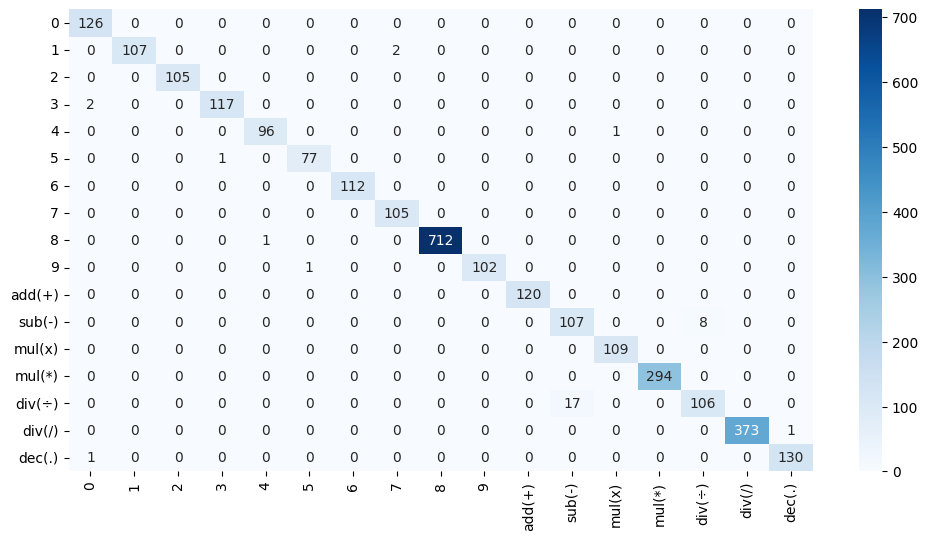

In [ ]:
matrix = confusion_matrix(Y_test_hat, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'add(+)', 'sub(-)', 'mul(x)', 'mul(*)', 'div(÷)', 'div(/)','dec(.)'],
                     columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'add(+)', 'sub(-)', 'mul(x)', 'mul(*)', 'div(÷)', 'div(/)','dec(.)'])
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')

# Result

## Saving the Model

In [ ]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")
model.save('/content/drive/MyDrive/IS Report/02/model_final')

In [ ]:
import numpy as np
import cv2

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K

K.set_image_data_format('channels_first')

from IPython.display import Image

In [ ]:
json_file = open('/content/model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#Loading saved weights into new model
loaded_model.load_weights("/content/maths_symbol_and_digits_recognition.h5")


## Test Model 1

In [ ]:
img = cv2.imread('/content/Picture3.jpg',cv2.IMREAD_GRAYSCALE)

cv2.waitKey(0)
cv2.destroyAllWindows()

if img is not None:
    img =~ img
    ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    ctrs, ret = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []

    rects = []

    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)

    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0

            if (rec!=r):
                if (r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10)):
                    flag = 1
                l.append(flag)

            if (rec == r):
                l.append(0)

        bool_rect.append(l)

    dump_rect = []

    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2]*rects[i][3]
                area2 = rects[j][2]*rects[j][3]
                if(area1 == min(area1,area2)):
                    dump_rect.append(rects[i])

    final_rect=[i for i in rects if i not in dump_rect]

    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+10,x:x+w+10]

        im_resize = cv2.resize(im_crop,(28,28))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28,1))
        train_data.append(im_resize)

In [ ]:
s = ''

for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28, 28, 1)

    result = (loaded_model.predict(train_data[i]) > 0.5).astype("int32")

    if(result[0][0]==1):
        s=s+'0'

    if(result[0][1]==1):
        s=s+'1'

    if(result[0][2]==1):
        s=s+'2'

    if(result[0][3]==1):
        s=s+'3'

    if(result[0][4]==1):
        s=s+'4'

    if(result[0][5]==1):
        s=s+'5'

    if(result[0][6]==1):
        s=s+'6'

    if(result[0][7]==1):
        s=s+'7'

    if(result[0][8]==1):
        s=s+'8'

    if(result[0][9]==1):
        s=s+'9'

    if(result[0][10]==1):
        s=s+'+'

    if(result[0][11]==1):
        s=s+'-'

    if(result[0][12]==1):
        s=s+'*'

    if(result[0][13]==1):
        s=s+'/'

    if(result[0][14]==1):
        s=s+'='

    if(result[0][15]==1):
        s=s+'.'
print("\n"*2, "The evaluation of the image gives equation : ", s, "\n"*2)

1/1 [==============================] - 0s 30ms/step


 The evaluation of the image gives equation :  45.122*10 




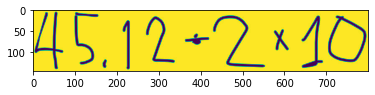

In [ ]:
img = cv2.imread('/content/Picture3.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [ ]:
print("\n"*2, "The evaluation of the image gives --> ", s, " = ", eval(s), "\n"*2)



 The evaluation of the image gives -->  45.122*10  =  451.22 




## Test Model 2

In [ ]:
model = load_model("/content/maths_symbol_and_digits_recognition.h5")

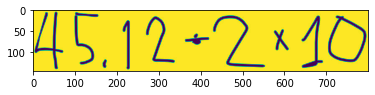

In [ ]:
img = cv2.imread('/content/Picture3.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [ ]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect))
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

10
0
[[4, 4, 68, 136], [100, 6, 56, 123], [167, 118, 9, 19], [214, 25, 17, 116], [270, 16, 68, 109], [363, 56, 57, 26], [430, 13, 124, 123], [576, 46, 34, 49], [642, 14, 50, 123], [705, 14, 91, 110]]


In [ ]:
equation=''

for i in range(len(train_data)):

    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)

    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)

    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    if result[0] == 15 :
        equation = equation + "."

print("Your Equation :", equation)

1/1 [==============================] - 0s 24ms/step
Your Equation : 45.12+2*10


In [ ]:
f = eval(equation)
print("\n"*2, "The evaluation of the image gives --> ", equation, " = ", '%.2f' %f, "\n"*2)



 The evaluation of the image gives -->  45.12+2*10  =  65.12 


